In [25]:
%config InlineBackend.figure_format = 'retina'
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math

# Problem 1) Non-linear Transformation

Recall from what we did in class that we guess the probability of the form

$$
P(Y=1 | \vec{x} ; \vec{w}) = \theta(w_0+w_1x_1+w_2x_2)
$$

Thus the equation for the separating boundary is a line equation $w_0+w_1x_1+w_2x_2 = \text{constant}$.

We can makes our model more complicated by transforming our feature to higher dimension. Concretely supposed that we want the boundary to be of a [oval-ish](https://math.stackexchange.com/questions/426150/what-is-the-general-equation-of-the-ellipse-that-is-not-in-the-origin-and-rotate) shape. We could use

$$
P(Y=1 | \vec{x} ; \vec{w}) = \theta(w_0 + w_1 x_1 + w_2 x_2 + w_3 x_1 x_2 + w_4 x_1^2 + w_5 x_2^2)
$$

This gives the boundary equation of the form $w_0 + w_1 x_1 + w_2 x_2 + w_3 x_1 x_2 + w_4 x_1^2 + w_5 x_2^2 = \text{constant}$ which is a rotated oval shape.

But, if we look care fully at the equation above. The term inside the $\theta$ function is just $\vec{w} \cdot \vec{X}$ where

$$
    \vec{w} = [w_0, w_1, w_2, w_3, w_4] \\
    \vec{X} = [1, x_1, x_2, x_1x_2, x_1^2, x_2^2]
$$

This means all we need to do is non-linearly transforming the features $\vec{x} \to \vec{X}$
$$
    [x_1, x_2] \to [x_1, x_2, x_1x_2, x_1^2, x_2^2]
$$
then put it in to logistic regression we did in class.

There is really nothing stopping us from going to even higher dimension; you just add more polynomial terms.

## Your Task
Train the logistic regression with non-linear transfrom on the features. Draw the separating line at 10, 30, 50, 90%. Use [contour plot](https://jakevdp.github.io/PythonDataScienceHandbook/04.04-density-and-contour-plots.html).

,x1,x2,xclass
0,0.383039,1.244218,1.0
1,0.875455,1.570717,-1.0
2,1.559952,0.545185,1.0
3,0.552929,1.603744,-1.0
4,1.916279,1.751865,-1.0


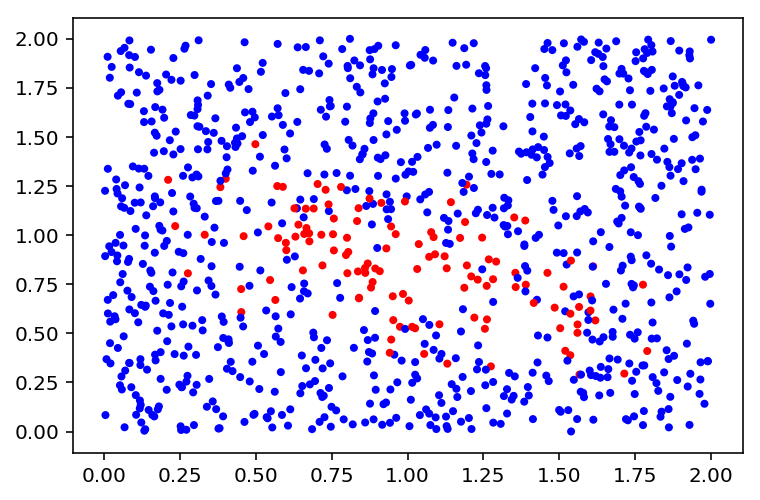

In [26]:
df = pd.read_csv('data/problem1.csv')
display(df.head())
plt.scatter(df.x1, df.x2, color=df.xclass.map(lambda x: 'r' if x > 0 else 'b'), marker='.')

# Problem 2) Vectorization: Same Same but Different.



Naive Bayes Classifer can naturally do categorical varible while logistic regression can naturally do continuous variable. In this problem we will get logistic regression to take care of categorical variable.

## 2.1) Vectorization(As usual, I made up the name. Look up and tell me what's it's called)

Logistic regression can only take continuous input. Thus, for any categorical input we need to turn it into continuous variable first.

Consider the mushroom problem we discussed last week. Let us consider the `cap_color` feature which can be red, green, black, gray etc.

### Bad Idea(Assigning arbitary number to it)

**(Don't do this in AJ Sunsern's class or he will blame me for not teaching it.)**

You might be tempted to just assign an integer value to each color ex: red=1, green=2, black=3, gray=4, other=5. This is a terrible idea. 

Recall that logistic regression is based on the number value of the variable.Concretely, we model the probability as $\theta(\vec{w}\cdot\vec{x})$. The higher the value of $\vec{w}\cdot\vec{x}$ means more probability. The arbitary number we assign to each color carry no intrinsic relation/ordering to the probaility. Ex: it is not necessarily that the probability of red < green < black < gray < others. Even worse there is nothing preventing you from shuffling the number to red=2, green=1, black=4, gray=5, other=3 which will clearly gives you another model. Your model should not depend on your arbitary choice of numbering.
    
### Better Idea (Vectorization)

Now that we see that the color carry no specific ordering relation to the probability. But the fact that it has a red cap(1) or not actually contains some relation to the probility. Thus we can transform our feature in the following fashion:

| original | red_cap | green_cap | blue_cap | black_cap | other_cap |
|----------|---------|-----------|----------|-----------|-----------|
| 'red'    | 1       | 0         | 0        | 0         | 0         |
| 'blue'   | 0       | 0         | 1        | 0         | 0         |
| 'black'  | 0       | 0         | 0        | 1         | 0         |


That is a given color is transformed into a vector of 1 and 0 where it's 1 at it's cap color feature and 0 otherwise. Ex: 'red' cap color is turned in to (1,0,0,0,0) as shown above.

### Your Task

Look at `mushrooms_homework_train.csv` and train logistic classifier for it using the vectorization technique. Test the performance using `mushrooms_homework_test.csv`









## 2.2) Logistic and Naive Bayes are Actually the Same Thing through Vectorization. 

2.2.1) Show the following

$$
\frac{A}{A+B} = \frac{1}{1+e^{-(\ln A + \ln B)}}
$$

2.2.2) For simplicity let us consider just the 2 categorical features 

- cap color $C = \{c_1, c_2, \ldots c_n\}$ where $c_i$'s are particular color ex: red. 
- cap shape $S = \{s_1, s_2, \ldots s_m\}$ where $s_j$'s are particular shape ex: round.

for deciding whether it is edible($E$) or not using Naive Bayes.

Show that:

$$
    P(E|C=c_i, S=s_j) = \frac{1}{1+e^{-\ldots}}
$$

Where $c_i$ and $s_j$ are particular color and shape(eg: 'red', 'round'). 

## Your Task

Find the $\ldots$ part.

Hint look at Naive Bayes formula.

2.2.3) Supposed we use vectorization technique.

$$
P(E|C=c, S=s; \vec{w}) = \theta(\vec{w}\cdot\vec{x})
$$

Let $w_{c_i}$ be the weight which gets multiplied to $c_i$ column and $w_{s_j}$ be the weight which gets multiplied to $s_j$ feature. Ex: $w_{red}$ gets multplied to red cap color feature.

### Your Task:

Compare this expression with what you got in 2.2.2 and express these weight in terms of probabilities

- What is $$
w_0 = \ldots
$$
- What is 
$$w_{c_i} = \ldots$$

- What is 
$$w_{s_j} = \ldots$$

# Problem 3) Dealing Class Imbalance: Logistic Regression as Penalization.


Recall the cost function for logistic regression

$$
cost(\vec{w}) = -\sum_i \ln \theta(y^{(i)}\vec{w}\cdot x^{(i)})
$$

We want $\vec{w}$ that minimize the cost function. To give you a deeper understanding of the terms lets us see how we can make this term as low as possible.

## 3.1

For each of the following statement below make the right answer **bold**.

### To Minimize the cost function

1. We want $\theta(y^{(i)}\vec{w}\cdot \vec{x}^{(i)})$ to be (low/high).
2. This means that we want $y^{(i)}\vec{w}\cdot \vec{x}^{(i)}$ to be (low/high).
3. This means if $y^{(i)}$ is *positive* we want $\vec{w}\cdot\vec{x}^{(i)}$ to be (positive/negative).
4. This means if $y^{(i)}$ is *negative* we want $\vec{w}\cdot\vec{x}^{(i)}$ to be (positive/negative).
5. If $y^{(i)}\vec{w}\cdot \vec{x}^{(i)}$ is negative, it means that we (correctly/incorrectly) classify the data(assuming the cut off at $P=0.5$).
6. For every false positive, $y^{(i)}$ is (positive/negative) and $y^{(i)}\vec{w}\cdot{\vec{x}^{(i)}}$ is (positive/negative).
7. For every false negative, $y^{(i)}$ is (positive/negative) and $y^{(i)}\vec{w}\cdot{\vec{x}^{(i)}}$ is (positive/negative).

## 3.2 Real Question

The cost function we build in class penalize both false negative and false positive equally. Thus, the function will essentially try to maximize the amount of correct answer we got.

In certain application especially where we are searching for rare catastropic event (Ex: Searching for a rare deadly contagious disease which happen in 0.01% of the population), maximizing the percent of correct answer is not exactly a good idea. We can just say NO all the time and get most of the answer correct but we would have ended the humanity.

We want to modify the cost function such that it penalize false negative and false positive differently.


### Make the right answer bold

Given $pos = \{i | y^{(i)} > 0\}$ and $neg = \{i | y^{(i)} > 0\}$

1. Consider the follwing modification

$$
cost(\vec{w}) = -0.01\sum_{i \in pos} \ln \theta(y^{(i)}\vec{w}\cdot x^{(i)}) - \ln \theta(y^{(i)}\vec{w}\cdot x^{(i)})
$$

We penalize more on (false postive/false negative).

2. Consider the follwing modification

$$
cost(\vec{w}) = -\frac{1}{n_{pos}}\sum_{i \in pos} \ln \theta(y^{(i)}\vec{w}\cdot x^{(i)}) - \frac{1}{n_{neg}}\sum_{i \in neg} \ln \theta(y^{(i)}\vec{w}\cdot x^{(i)})
$$

where

- $pos = \{i | y^{(i)} > 0\}$
- $neg = \{i | y^{(i)} > 0\}$
- $n_{pos} = |pos|$ and $n_{neg} = |neg|$ 

If $npos < neg$, We penalize more on (false postive/false negative).




## 3.3 Put it to Practice

One popular modification is where the penalty is normalized by the number of data in pos/neg accordingly. This has the effect of scaling/over sampling the minority up to the same footing as the majority class:

$$
cost(\vec{w}) = -\frac{1}{n_{pos}}\sum_{i \in pos} \ln \theta(y^{(i)}\vec{w}\cdot x^{(i)}) - \frac{1}{n_{neg}}\sum_{i \in neg} \ln \theta(y^{(i)}\vec{w}\cdot x^{(i)})
$$

where

- $pos = \{i | y^{(i)} > 0\}$
- $neg = \{i | y^{(i)} > 0\}$
- $n_{pos} = |pos|$ and $n_{neg} = |neg|$

### Your Task:

Build two logistic classifier: one with normal cost function and the other one with modified cost function shown above.

Given a cut at 0.5. Count false negative and false positive for both classifiers. To see that it has the desired effect.
